<a href="https://colab.research.google.com/github/bhavana1234-bit/bhavana-Devops/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description:
In this project, heart data is used, the target of which is in two classes. People who have heart disease and people who don't. The importance of this type of project in the medical world is very high and it should be given more attention. In this kernel, I create a predictive model with the help of different classification algorithms so that people can be predicted to have or not have a disease.

Dataset url :kaggle kernels output gkitchen/heart-disease-prediction -p /path/to/dest

### Name of the columns with their meanings

1) age --> age of the person

2) sex --> gender of the person

3) cp--> chest pain type

4) trtbps --> resting blood pressure (in mm hg)

5) chol --> cholestoral in mg/dl fetched via BMI sensor

6) fbs --> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7) restecg--> resting electrocardiographic results

8) thalachh--> maximum heart rate achieved

9) exng --> exercise induced angina (1 = yes; 0 = no)

10)old peak-->previous peak

 11)ST Slope -->ST slope is the angle of the line segment on an ECG between the end of the QRS complex and the beginning of the T wave, indicating heart health.

  12)Heart Disease --> Heart disease is a binary classification problem in the dataset, represented by 0 (absence) and 1 (presence) of the condition.







               

### Step 1 : Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Step2 : Load the Dataset

In [ ]:
# Load pima indians dataset
df = pd.read_csv("/content/heart (3).csv")

### Step 3 : Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

3.1) Understanding Your Variables<br>
&emsp;3.1.1) Head of the dataset<br>
&emsp;3.1.2) The shape of the dataset<br>
&emsp;3.1.3) List types of all columns<br>
&emsp;3.1.4) Info of the dataset<br>
&emsp;3.1.5) Summary of the dataset

3.2) Data Cleaning<br>
&emsp;3.2.1) Check the DUPLICATES <br>
&emsp;3.2.2) Check the NULL values<br>

#### 3.1.1) Head of the Dataset


This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [ ]:
# Display first five records of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Display last five records of the data
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
# Display randomly any number of records of data
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
853,47,M,NAP,138,257,0,LVH,156,N,0.0,Up,0
745,63,F,ASY,108,269,0,Normal,169,Y,1.8,Flat,1
837,57,M,NAP,150,168,0,Normal,174,N,1.6,Up,0
188,50,F,ASY,120,328,0,Normal,110,Y,1.0,Flat,0
591,58,M,ASY,100,213,0,ST,110,N,0.0,Up,0
618,64,M,ASY,128,263,0,Normal,105,Y,0.2,Flat,0
844,52,M,TA,118,186,0,LVH,190,N,0.0,Flat,0
147,43,F,ATA,120,249,0,ST,176,N,0.0,Up,0
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat,1
679,63,M,TA,145,233,1,LVH,150,N,2.3,Down,0


#### 3.1.2) The shape of the dataset

This shape () function gives us the number of rows and columns of the dataset.

In [ ]:
#Number of rows and columns
df.shape

(918, 12)

No.of Rows=918

No.of Columns=12

#### 3.1.3) List types of all columns

Using df.dtypes, we get the list of types of all the columns in our dataset.

In [ ]:
#List the types of all columns.
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


#### 3.1.4) Info of the dataset

info() is used to check the Information about the data and the datatypes of each respective attribute.

In [ ]:
#finding out if the dataset contains any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### 3.1.5) Summary of the dataset

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
# Statistical summary
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Observation:

In the above table, the min value of columns 'resting bp','cholesterol', 'fasting bs', 'old peak', 'heartdiseas' is zero (0). It is clear that this values can't be zero.So we impute the mean values of these respective columns instead of zero.

### 3.2) Data Cleaning

#### 3.2.1) Drop the Duplicates

check is there any duplicate rows are exist or not, if exist then we should remove from the dataframe.

In [ ]:
# check the shape before drop the duplicates
df.shape

(918, 12)

In [ ]:
df=df.drop_duplicates()

In [ ]:
# check the shape after drop the duplicates
df.shape

(918, 12)

Before droping and after droping the duplicates the data set has same shape so no duplicates are there in the dataset.

### 3.2.2) Check the NULL Values

Using isnull.sum() function we can see the null values present in the every column in the dataset.

In [ ]:
# Count of null, values

# check the missing values in any column
# Display number of null values in every column in dataset
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


There is no NULL values in the given dataset.

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Check the no.of Zero values in dataset

In [ ]:
print('No. of zero values in RestingBP',df[df['RestingBP']==0].shape[0])

No. of zero values in RestingBP 1


In [ ]:
print('No. of zero values in Cholesterol',df[df['Cholesterol']==0].shape[0])

No. of zero values in Cholesterol 172


In [ ]:
print('No. of zero values in Oldpeak',df[df['Oldpeak']==0].shape[0])

No. of zero values in Oldpeak 368


In [ ]:
print('No. of zero values in FastingBS',df[df['FastingBS']==0].shape[0])

No. of zero values in FastingBS 704
No. of zero values in FastingBS 704


In [ ]:
print('No. of zero values in HeartDisease ',df[df['HeartDisease']==0].shape[0])

No. of zero values in HeartDisease  410


Replace no.of zero values with mean of that columns

In [ ]:
df['RestingBP']=df['RestingBP'].replace(0, df['RestingBP'].mean())
print('No. of zero values in RestingBP',df[df['RestingBP']==0].shape[0])

No. of zero values in RestingBP 0


In [ ]:
df['Cholesterol']=df['Cholesterol'].replace(0, df['Cholesterol'].mean())
df['FastingBS']=df['FastingBS'].replace(0,df['FastingBS'].mean())
df['Oldpeak']=df['Oldpeak'].replace(0,df['Oldpeak'].mean())
df['HeartDisease']=df['HeartDisease'].replace(0, df['HeartDisease'].mean())

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,0.411888,136.809368,1.243083,0.800528
std,9.432617,17.989932,56.240952,0.324427,25.460334,0.833608,0.222156
min,28.000000,80.000000,85.000000,0.233115,60.000000,-2.600000,0.553377
25%,47.000000,120.000000,198.799564,0.233115,120.000000,0.887364,0.553377
50%,54.000000,130.000000,223.000000,0.233115,138.000000,0.887364,1.000000
75%,60.000000,140.000000,267.000000,0.233115,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 4) Data Visualization

### 4.1) Count plot

Negative (0): 508
Positive (1): 410


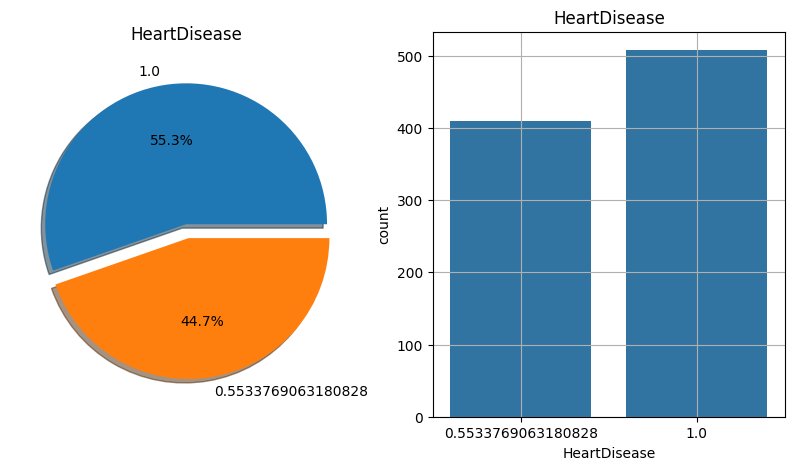

In [ ]:
# HeartDisease count plot

f,ax=plt.subplots(1,2,figsize=(10,5))
df['HeartDisease'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')
# Pass 'HeartDisease' as the x-axis argument
sns.countplot(x='HeartDisease',data=df,ax=ax[1])
ax[1].set_title('HeartDisease')
N,P=df['HeartDisease'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)

plt.grid()
plt.show()

### 4.2) Histograms

Histograms are one of the most common graphs used to display numeric data.

distribution of the data - Whether the data is normally distributed or if it's skewed (to the left or right)

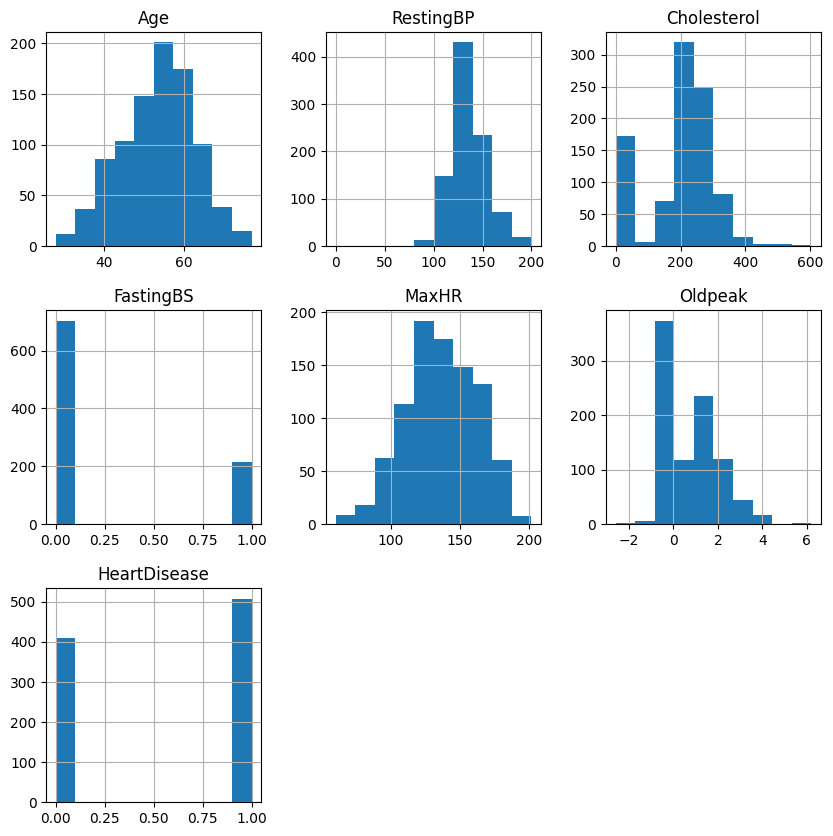

In [ ]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### 4.3) Scatter plot

Scatterplots are useful for many reasons: like correlation matrices, it allows us to quickly understand a relationship between two variables.

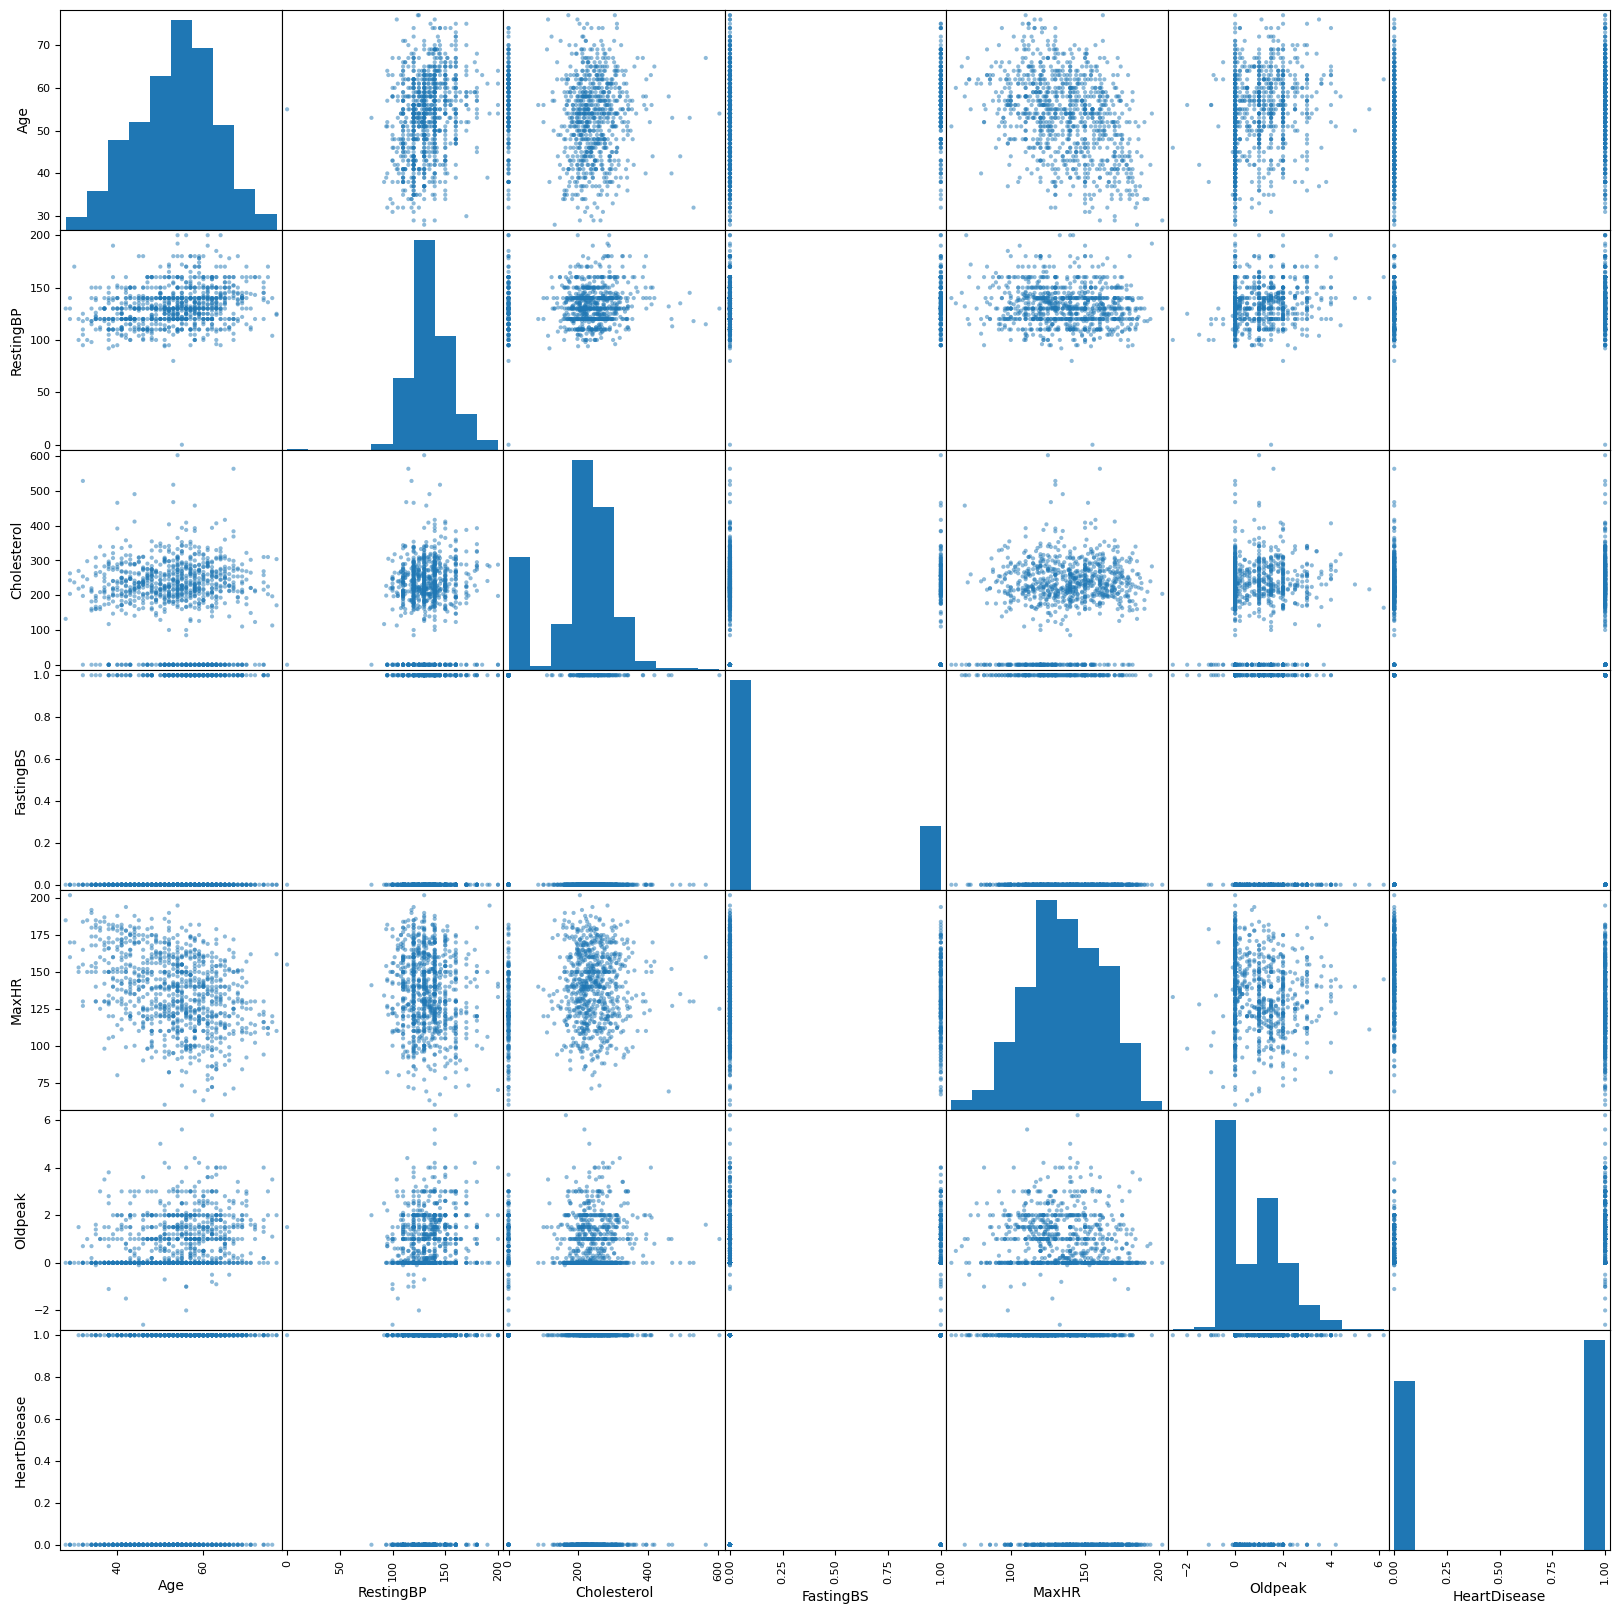

In [ ]:
# Scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

### 4.4) Pairplot

sns.pairplot() is a great way to create scatterplots between all of our variables.

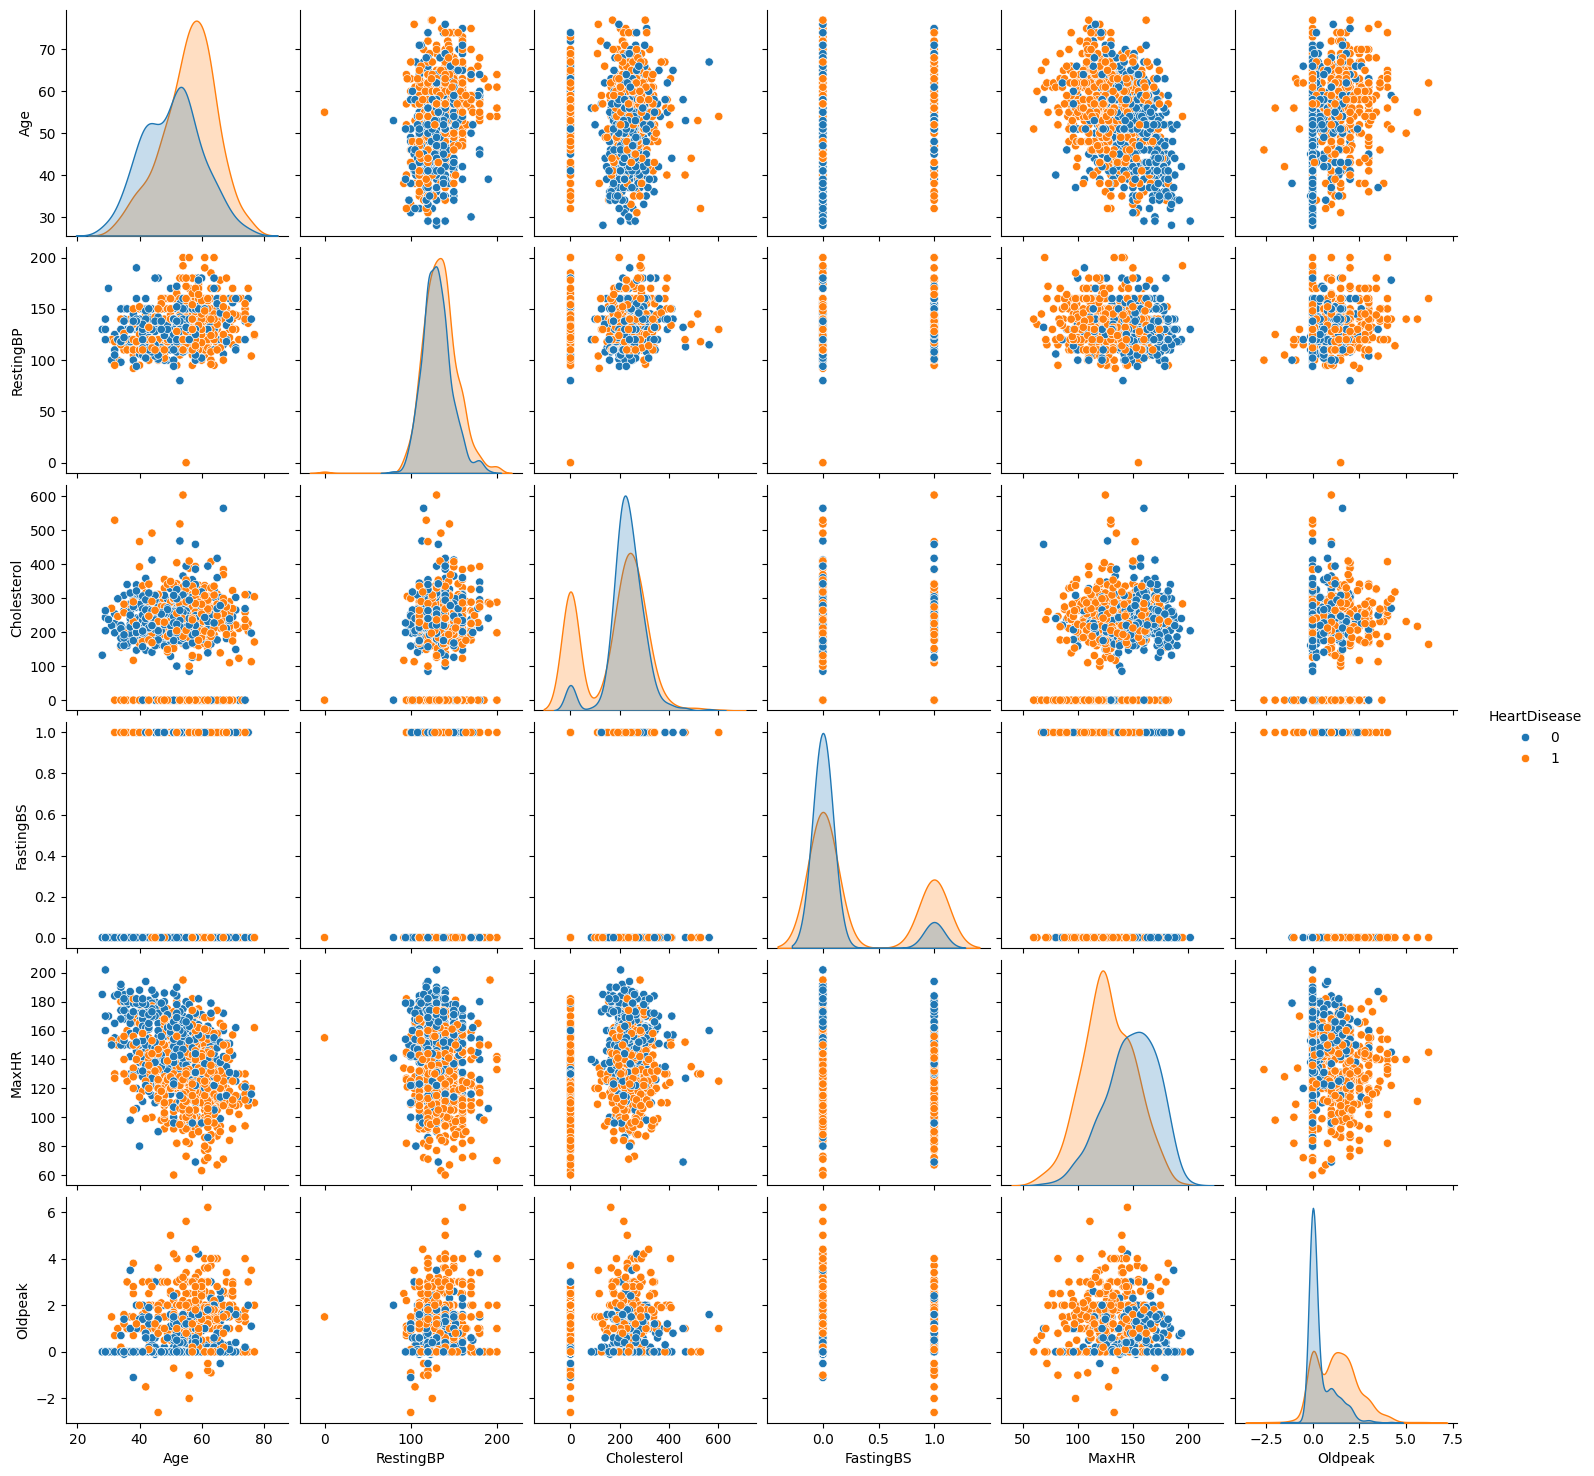

In [ ]:
# Pairplot

sns.pairplot(data = df, hue = 'HeartDisease')
plt.show()

### 4.5) Analyzing relationships between variables

#### Correlation analysis

Correlation analysis in data science is a statistical technique used to measure the strength and direction of the relationship between two or more variables in a dataset. It helps data scientists understand how changes in one variable are associated with changes in another. By calculating correlation coefficients, such as Pearson's correlation coefficient for continuous variables or rank-based correlations for non-linear or ordinal data, data scientists can identify patterns and dependencies in the data. This analysis is valuable for feature selection, identifying potential predictor variables, and gaining insights into the interactions between different aspects of the dataset, facilitating better decision-making and predictive modeling.

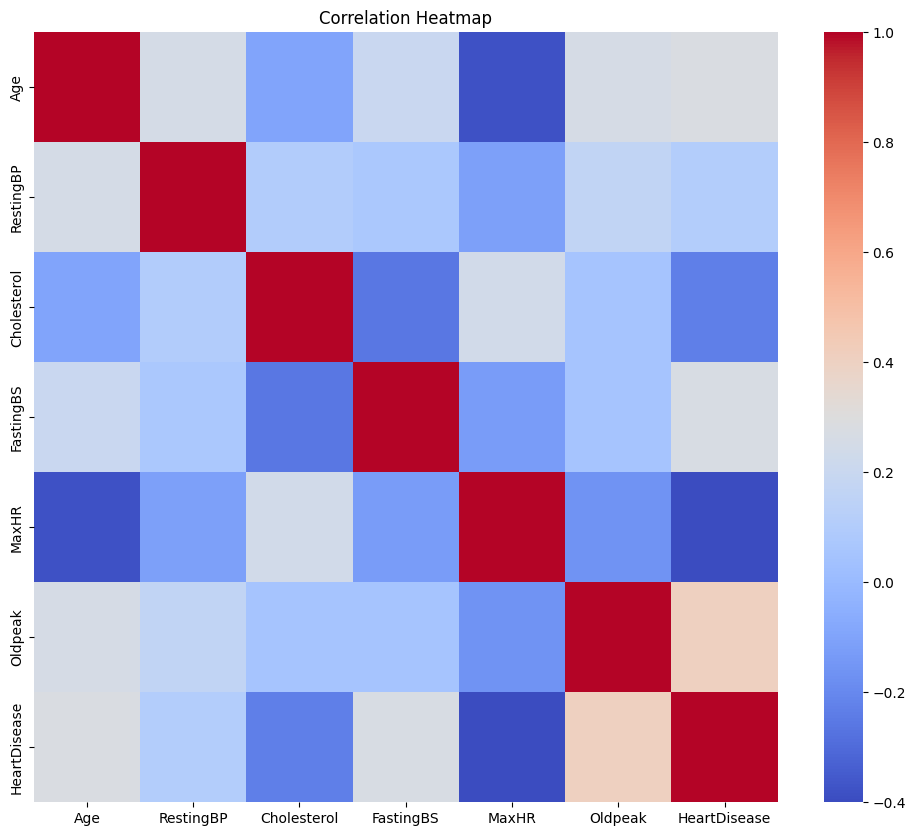

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5) Split the data frame into X & y

In [ ]:
target_name = 'HeartDisease'

# Separate object for target feature
y=df[target_name]

#Separate Object for Input Features
X = df.drop(target_name, axis=1)

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [ ]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


## 6) Apply Feature Scalling

In [ ]:
# Apply Standard Scaler only to numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select numerical columns
numerical_cols = X.select_dtypes(include=['float', 'int']).columns
X_numerical = X[numerical_cols]

# Fit and transform numerical data
scaler.fit(X_numerical)
SSX_numerical = scaler.transform(X_numerical)

# Optionally, you can replace the original numerical columns in X with the scaled ones:
X[numerical_cols] = SSX_numerical

Inplace of Standard Scaler you have to try other data scaling technique like normalizer, minmax scaler and binarizer

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX_numerical, y, test_size=0.2, random_state=7) # Use SSX_numerical instead of SSX

In [ ]:
X_train.shape, y_train.shape

((734, 6), (734,))

In [ ]:
X_test.shape, y_test.shape

((184, 6), (184,))

## 8) Build the Classification Algorithms

### 8.1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### 8.2) KNeighborsClassifier(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 8.3) Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 8.4) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC()

### 8.5) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 8.6) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## 9) Making Prediction

### 9.1) Making Prediction on test by using Logistic Regression

In [ ]:
# display the shape of test data
X_test.shape

(184, 6)

In [ ]:
# making prediction on test dataset
lr_pred=lr.predict(X_test)

In [ ]:
# display the shape of predict data
lr_pred.shape

(184,)

### 9.2) Making Prediction on test by using KNN

In [ ]:
# making prediction on test dataset
knn_pred=knn.predict(X_test)

### 9.3) Making Prediction on test by using Naive-Bayes

In [ ]:
# making prediction on test dataset
nb_pred=nb.predict(X_test)

### 9.4) Making Prediction on test by using SVM

In [ ]:
# making prediction on test dataset
sv_pred=sv.predict(X_test)

### 9.5) Making Prediction on test by using Decission Tree

In [ ]:
# making prediction on test dataset
dt_pred=dt.predict(X_test)

### 9.6) Making Prediction on test by using Random Forest

In [ ]:
# making prediction on test dataset
rf_pred=rf.predict(X_test)

## 10) Model Evaluation

### 10.1) Train and Test Score

In [ ]:
# Train and Test Score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train Accuracy score of Logistic Regression",lr.score(X_train,y_train)*100)
print("Test Accuracy score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy of score Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Accuracy score of Logistic Regression 77.3841961852861
Test Accuracy score of Logistic Regression 74.45652173913044
Accuracy of score Logistic Regression 74.45652173913044


In [ ]:
# Train and Test Score of KNN
print("Train Accuracy score of KNN",knn.score(X_train,y_train)*100)
print("Test Accuracy score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy of score KNN",accuracy_score(y_test,knn_pred)*100)

Train Accuracy score of KNN 82.01634877384197
Test Accuracy score of KNN 74.45652173913044
Accuracy of score KNN 74.45652173913044


In [ ]:
# Train and Test Score of Naive-Bayes
print("Train Accuracy score of Naive-Bayes",nb.score(X_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes",nb.score(X_test,y_test)*100)
print("Accuracy of score Naive-Bayes",accuracy_score(y_test,nb_pred)*100)

Train Accuracy score of Naive-Bayes 78.2016348773842
Test Accuracy score of Naive-Bayes 75.54347826086956
Accuracy of score Naive-Bayes 75.54347826086956


In [ ]:
# Train and Test Score of SVM
print("Train Accuracy score of SVM",sv.score(X_train,y_train)*100)
print("Test Accuracy score of SVM",sv.score(X_test,y_test)*100)
print("Accuracy of score SVM",accuracy_score(y_test,sv_pred)*100)

Train Accuracy score of SVM 81.33514986376021
Test Accuracy score of SVM 78.26086956521739
Accuracy of score SVM 78.26086956521739


In [ ]:
# Train and Test Score of Decision Tree
print("Train Accuracy score of Decision Tree",dt.score(X_train,y_train)*100)
print("Test Accuracy score of Decision Tree",dt.score(X_test,y_test)*100)
print("Accuracy of score Decision Tree",accuracy_score(y_test,dt_pred)*100)

Train Accuracy score of Decision Tree 100.0
Test Accuracy score of Decision Tree 69.56521739130434
Accuracy of score Decision Tree 69.56521739130434


In [ ]:
# Train and Test Score of Random Forest
print("Train Accuracy score of Random Forest",rf.score(X_train,y_train)*100)
print("Test Accuracy score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy of score Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy score of Random Forest 100.0
Test Accuracy score of Random Forest 74.45652173913044
Accuracy of score Random Forest 74.45652173913044


## 10.2) Confusion Matrix

Confusion metrices is a Table which is used to describe the performance of classificaion problem

It visualizes the accuracy of a classifier by comparing predicted values with actual values.

The terms used in confusion matrices are True Positive(TP), True Negetive(TN), False Positive(FP) and False Negetive(FN)

### 10.2.1) Confusion Matrix of Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion Matrix of Logistic Regression
cm=confusion_matrix(y_test, lr_pred)
cm

array([[60, 30],
       [17, 77]])

<Axes: >

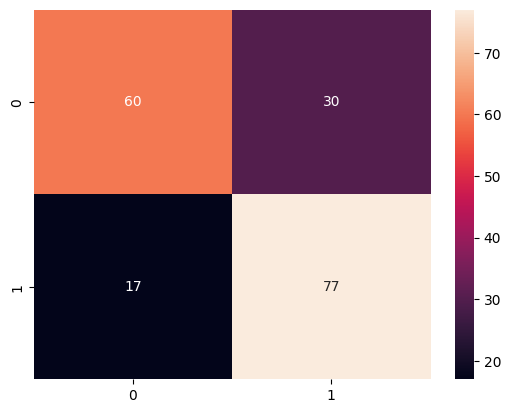

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d")

In [ ]:
TN = cm[0,0]

FP = cm[0,1]

FN = cm[1,0]

TP = cm[1,1]

TN, FP, FN, TP

(60, 30, 17, 77)

In [ ]:
# Making the Confusion Matrix Of Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, lr_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP False Positive {}'.format(cm[0,1]))
print('FN False Negative {}'.format(cm[1,0]))
print('TP True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]), np.sum(cm))*100))

TN - True Negative 60
FP False Positive 30
FN False Negative 17
TP True Positive 77
Accuracy Rate: 74.45652173913044
Misclassification Rate: 25.543478260869566


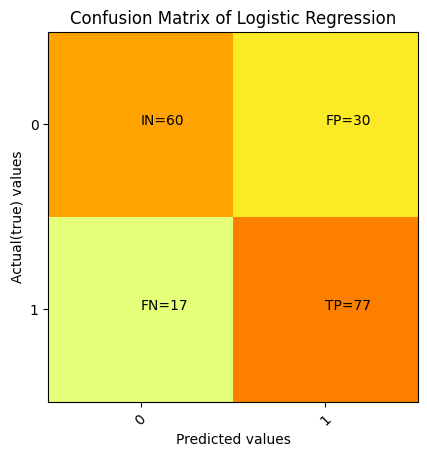

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['IN', 'FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))

plt.show()

In [ ]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
HeartDisease,,
0,60,30
1,17,77


In [ ]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
HeartDisease,,,
0,60,30,90
1,17,77,94
All,77,107,184


In [ ]:
pd.crosstab(y_test, lr_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,60,30,90
1,17,77,94
All,77,107,184


## PRECISION (PPV-Positive Predictive value)

It is the ratio of correctly predicted positive (TP) observations to the total predicted positive (TP+FP) observations.

Precision=TP/(TP+FP)

Where
        TP=True Positive

        FP-False Positive

In [ ]:
TP,FP

(77, 30)

In [ ]:
Precision=TP/(TP+FP)
Precision

0.719626168224299

In [ ]:
# print precision score

precision_Score = TP / float (TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score))

Precision score: 71.9626


In [ ]:
from sklearn.metrics import precision_score
print("precision Score is:", precision_score(y_test,lr_pred)*100)
print("Mircro Average precision Score is:", precision_score(y_test, lr_pred, average='micro')*100)
print("Marcro Average precision Score is:", precision_score(y_test, lr_pred, average='macro')*100)
print("Weighted Average precision Score is:", precision_score (y_test, lr_pred, average='weighted')*100)
print("precision Score on Non weighted score is:", precision_score (y_test, lr_pred, average=None)*100)

precision Score is: 71.96261682242991
Mircro Average precision Score is: 74.45652173913044
Marcro Average precision Score is: 74.94234737225392
Weighted Average precision Score is: 74.87757062117079
precision Score on Non weighted score is: [77.92207792 71.96261682]


In [ ]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test, lr_pred, digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7792    0.6667    0.7186        90
           1     0.7196    0.8191    0.7662        94

    accuracy                         0.7446       184
   macro avg     0.7494    0.7429    0.7424       184
weighted avg     0.7488    0.7446    0.7429       184



## Recall (True Positive Rate (TPR))

It is ratio of correctly predicted positive(Tp) observations to the total observations which are actually true.

In [ ]:
recall_score = TP / float (TP + FN)*100
print('recall score', recall_score)

recall score 81.91489361702128


In [ ]:
from sklearn.metrics import recall_score
print('Recall or Sensitivity score :',recall_score (y_test, lr_pred)*100)

Recall or Sensitivity score : 81.91489361702128


In [ ]:
print("Mircro Average Recall Score is:", recall_score(y_test, lr_pred, average='micro')*100)
print("Marcro Average Recall Score is:", recall_score (y_test, lr_pred, average='macro')*100)
print("Weighted Average Recall Score is: ", recall_score (y_test, lr_pred, average='weighted')*100)
print("Recall Score on Non weighted score is:", recall_score (y_test, lr_pred, average=None)*100)

Mircro Average Recall Score is: 74.45652173913044
Marcro Average Recall Score is: 74.29078014184397
Weighted Average Recall Score is:  74.45652173913044
Recall Score on Non weighted score is: [66.66666667 81.91489362]


In [ ]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test, lr_pred, digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7792    0.6667    0.7186        90
           1     0.7196    0.8191    0.7662        94

    accuracy                         0.7446       184
   macro avg     0.7494    0.7429    0.7424       184
weighted avg     0.7488    0.7446    0.7429       184



## False Positive Rate (FPR)

In [ ]:
FPR = FP / float (FP+ TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR))

False Positive Rate: 33.3333


## Specificity

In [ ]:
specificity = TP / float (TN+ FP)*100
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 85.5556


## F1 Score

In [ ]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_test, lr_pred)*100)

f1_score of macro : 76.61691542288557


In [ ]:
print('Mircro Average F1 Score is:', f1_score (y_test, lr_pred, average='micro')*100)
print('Marcro Average F1 Score is:', f1_score (y_test, lr_pred, average='macro')*100)
print('Weighted Average F1 Score is:', f1_score(y_test, lr_pred, average='weighted')*100)
print('F1 Score on Non weighted score is:', f1_score (y_test, lr_pred, average=None)*100)

Mircro Average F1 Score is: 74.45652173913044
Marcro Average F1 Score is: 74.23660142401762
Weighted Average F1 Score is: 74.28834738051475
F1 Score on Non weighted score is: [71.85628743 76.61691542]


## Classification Report of Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report of Logistic Regression: \n', classification_report (y_test, lr_pred, digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7792    0.6667    0.7186        90
           1     0.7196    0.8191    0.7662        94

    accuracy                         0.7446       184
   macro avg     0.7494    0.7429    0.7424       184
weighted avg     0.7488    0.7446    0.7429       184



## ROC Curve & ROC AUC

ROC curve is one the important evaluating metrics that should be used to check the performance of an classification model.It is also called relative operating characteristic curve, because it is a comparison of two main characteristics (TPR and FPR). It is plotted between sensitivity(aka recall aka True Positive Rate) and False Positive Rate (FPR = 1-specificity).

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no).

Area Under Curve (AUC) helps us to choose the best model amongst the models for which we have plotted the ROC curves

In [ ]:
# Area Under Curve

auc = roc_auc_score(y_test, lr_pred)
print("ROC AUC SCORE of Logistic Regression is", auc)

ROC AUC SCORE of Logistic Regression is 0.7429078014184398


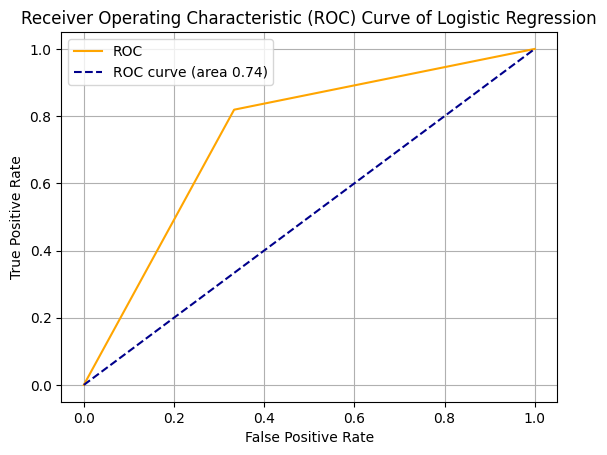

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()

## 10.2.2 Confusion Matrix of "KNN"

<Axes: >

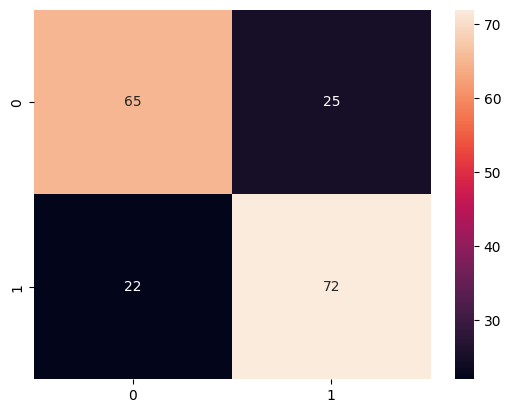

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt="d")

In [ ]:
# making the confusion matrix of knn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 65
FP - False Positive 25
FN - False Negative 22
TP - True Positive 72
Accuracy Rate: 74.45652173913044
Misclassification Rate: 25.543478260869566


In [ ]:
74.45652173913044+25.543478260869566

100.0

In [ ]:
# classification report of knn
print(' Classification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

 Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7471    0.7222    0.7345        90
           1     0.7423    0.7660    0.7539        94

    accuracy                         0.7446       184
   macro avg     0.7447    0.7441    0.7442       184
weighted avg     0.7446    0.7446    0.7444       184



## Area Under Curve of KNN

In [ ]:
# Area Under Curve

auc = roc_auc_score(y_test, knn_pred)
print("ROC AUC SCORE of KNN is", auc)

ROC AUC SCORE of KNN is 0.7440898345153665


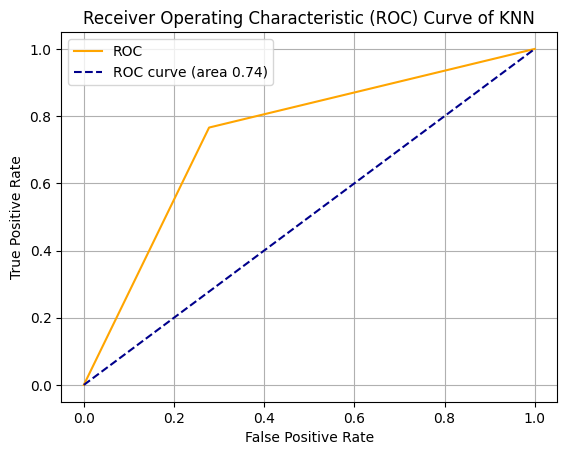

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()
plt.grid()
plt.show()

### 10.2.3 Confusion Matrix of "Naive Bayes"

In [ ]:
# making the confusion matrix of Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of Naive Bayes: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 65
FP - False Positive 25
FN - False Negative 20
TP - True Positive 74
Accuracy Rate: 75.54347826086956
Misclassification Rate of Naive Bayes: 24.456521739130434


In [ ]:
75.54347826086956+24.45652173913044

100.0

<Axes: >

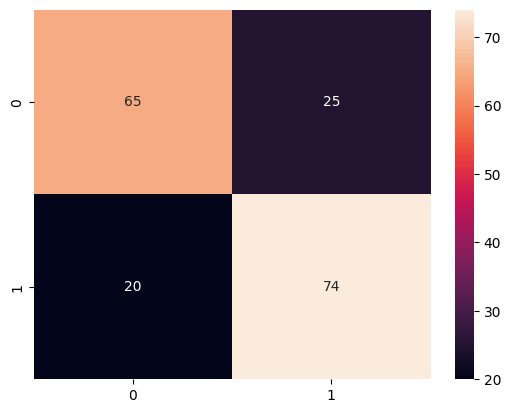

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt="d")

## Classification report of "Naive Bayes"

In [ ]:
# classification report of Naive Bayes
print(' Classification Report of Naive Bayes: \n', classification_report(y_test,nb_pred,digits=4))

 Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.7647    0.7222    0.7429        90
           1     0.7475    0.7872    0.7668        94

    accuracy                         0.7554       184
   macro avg     0.7561    0.7547    0.7548       184
weighted avg     0.7559    0.7554    0.7551       184



## Roc AUC Score of Naive Bayes

In [ ]:
# Area Under Curve

auc = roc_auc_score(y_test, nb_pred)
print("ROC AUC SCORE of Naive Bayes is", auc)

ROC AUC SCORE of Naive Bayes is 0.7547281323877068


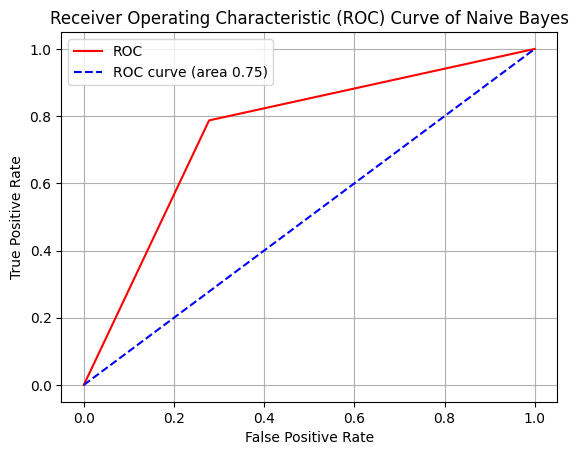

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, nb_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()
plt.grid()
plt.show()

## Confusion matric of "SVM"

In [ ]:
# making the confusion matrix of SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of SVM: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 70
FP - False Positive 20
FN - False Negative 20
TP - True Positive 74
Accuracy Rate: 78.26086956521739
Misclassification Rate of SVM: 21.73913043478261


## Classification Report of SVM

In [ ]:
# classification report of SVM
print(' Classification Report of SVM: \n', classification_report(y_test,sv_pred,digits=4))

 Classification Report of SVM: 
               precision    recall  f1-score   support

           0     0.7778    0.7778    0.7778        90
           1     0.7872    0.7872    0.7872        94

    accuracy                         0.7826       184
   macro avg     0.7825    0.7825    0.7825       184
weighted avg     0.7826    0.7826    0.7826       184



## Roc AUC of SVM

In [ ]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, sv_pred)*100,2)
print("ROC AUC SCORE of SVM is", auc)

ROC AUC SCORE of SVM is 78.25


<Axes: >

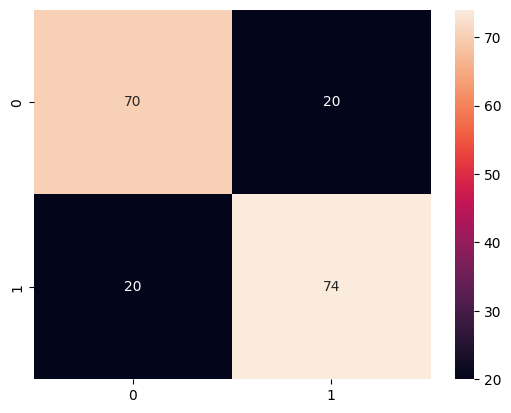

In [ ]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt="d")

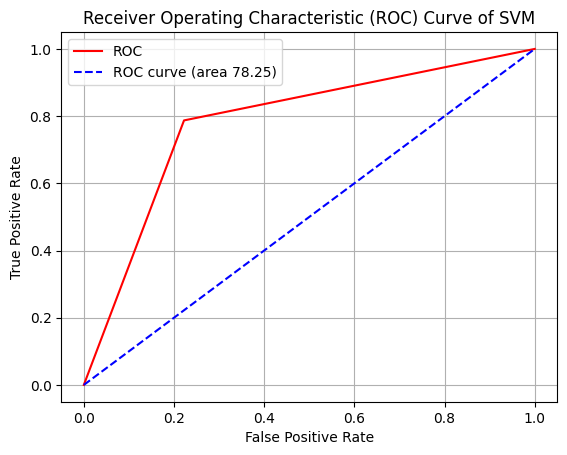

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, sv_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.grid()
plt.show()

### Confusion Matrix of "Decision Tree"

<Axes: >

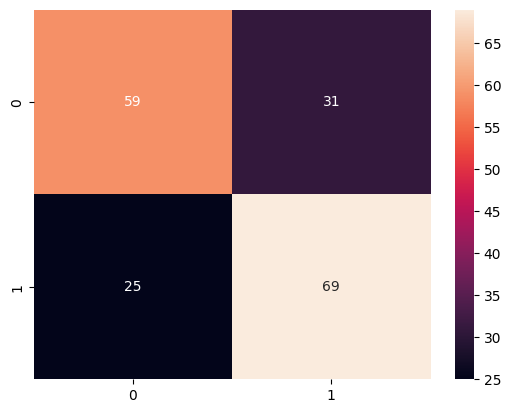

In [ ]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")

In [ ]:
# making the confusion matrix of DT
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate of DT: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

TN - True Negative 59
FP - False Positive 31
FN - False Negative 25
TP - True Positive 69
Accuracy Rate: 0.6956521739130435
Misclassification Rate of DT: 0.30434782608695654


In [ ]:
# classification report of DT
print(' Classification Report of Decision Tree: \n', classification_report(y_test,dt_pred,digits=4))

 Classification Report of Decision Tree: 
               precision    recall  f1-score   support

           0     0.7024    0.6556    0.6782        90
           1     0.6900    0.7340    0.7113        94

    accuracy                         0.6957       184
   macro avg     0.6962    0.6948    0.6948       184
weighted avg     0.6961    0.6957    0.6951       184



In [ ]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, dt_pred)*100,2)
print("ROC AUC SCORE of DT is", auc)

ROC AUC SCORE of DT is 69.48


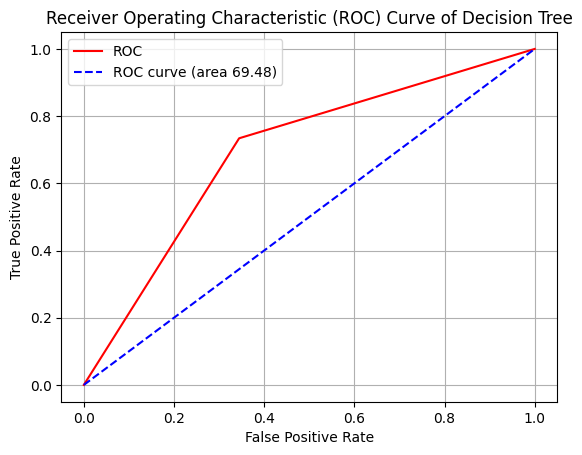

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, dt_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
plt.legend()
plt.grid()
plt.show()

## RANDOM FOREST

<Axes: >

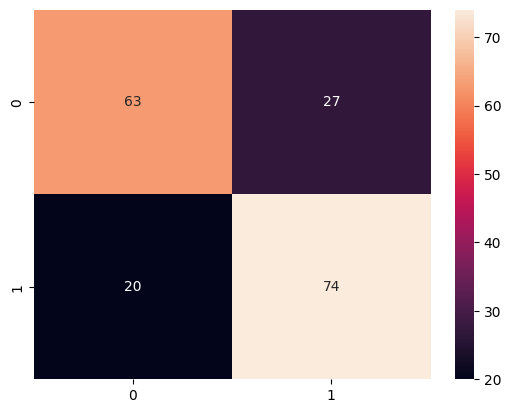

In [ ]:
# heat map of random forest
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")

In [ ]:
# making the confusion matrix of Random Forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate of Random Forest: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

TN - True Negative 63
FP - False Positive 27
FN - False Negative 20
TP - True Positive 74
Accuracy Rate: 0.7445652173913043
Misclassification Rate of Random Forest: 0.2554347826086957


## Classification report of Random Forest

In [ ]:
# classification report of Random forest
print(' Classification Report of Random Forest: \n', classification_report(y_test,rf_pred,digits=4))

 Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.7590    0.7000    0.7283        90
           1     0.7327    0.7872    0.7590        94

    accuracy                         0.7446       184
   macro avg     0.7459    0.7436    0.7436       184
weighted avg     0.7456    0.7446    0.7440       184



## Roc AUC of Random Forest

In [ ]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, rf_pred)*100,2)
print("ROC AUC SCORE of Random Forest is", auc)

ROC AUC SCORE of Random Forest is 74.36


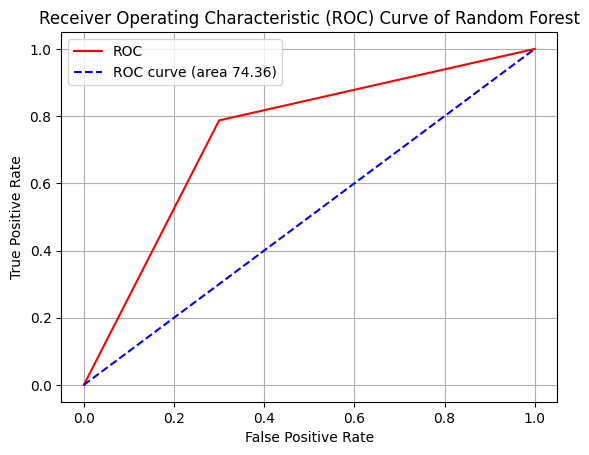

In [ ]:
fpr, tpr, thresholds = roc_curve (y_test, rf_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='ROC curve (area %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()
plt.grid()
plt.show()